<a href="https://colab.research.google.com/github/cristiandarioortegayubro/Inteligencia-y-Procesos-de-Negocios-en-la-Economia-Digital/blob/master/Inteligencia_y_procesos_de_negocios_en_la_econom%C3%ADa_digital_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Inteligencia y procesos de negocios en la economía digital**


## **Obtención de datos**

### Importando las librerías necesarias

In [1]:
pip install pandas-datareader

In [2]:
import pandas as pd
import pandas_datareader as data
import datetime as dt
import matplotlib.pyplot as plot

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


Se activa la librería pandas_datareader para obtener datos externos, matplotlib para hacer algunos gráficos, y pandas para darle formato a los datos en forma de tabla y poder agregar las variables necesarias (columnas).

### Obteniendo datos con DataReader

In [3]:
YPF = data.DataReader("YPF", start='2019-06-01', end='2020-04-12', data_source='yahoo')

Se activa datareader para acceder a los datos de la cotización de las acciones de YPF, y la fuente de datos a la que se accede para extraer los datos es Yahoo! Finanzas.

### Creando el DataFrame y realizando limpieza y transformación de datos

In [4]:
ypf = pd.DataFrame(YPF)

A los datos guardados en la variable YPF, se les da forma de tabla y se los guarda en otra variable denominada ypf. El comando utilizado es pd.Dataframe(), que es de pandas.

In [5]:
ypf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-03,15.24,14.55,14.94,14.97,1471900.0,14.856053
2019-06-04,15.22,14.71,15.05,15.13,2318800.0,15.014835
2019-06-05,15.28,14.89,15.03,15.06,947700.0,14.945369
2019-06-06,15.40,14.88,15.20,15.23,868200.0,15.114074
2019-06-07,15.69,15.19,15.33,15.64,1189200.0,15.520953


Para visualizar los primeros cinco registros de la tabla y todas las variables (columnas), se utiliza head(). La sintaxis sería ypf.head() para que muestre los datos contenidos en la tabla generada en ypf. Observar que las variables son las siguientes:
+ High: representa el valor más alto de cotización para esa fecha.
+ Low: representa el valor más bajo de cotización para esa fecha.
+ Open: representa el valor de apertura para esa fecha.
+ Close: representa el valor de cierre para esa fecha.


In [6]:
ypf.shape

(217, 6)

Para saber cuantas observaciones tiene el conjunto de datos se utiliza el comando shape, y el resultado indica, en primer lugar 21 observaciones y seis variables (columnas). A primera vista pareciera que no estarían las cotizaciones de los días sábados y domingos. Con unos simples comandos se puede constatar tal apreciación.

In [7]:
Date = ypf.index.values

Se genera la variable Date (Fecha), con los valores consignados como nombre de fila.

In [8]:
ypf.insert(0,column='Date',value=Date)

Luego se inserta esos valores como primera columna, el valor de los datos es la variable generada denominada Date (Fecha).

In [9]:
print(ypf)

                 Date   High    Low   Open  Close     Volume  Adj Close
Date                                                                   
2019-06-03 2019-06-03  15.24  14.55  14.94  14.97  1471900.0  14.856053
2019-06-04 2019-06-04  15.22  14.71  15.05  15.13  2318800.0  15.014835
2019-06-05 2019-06-05  15.28  14.89  15.03  15.06   947700.0  14.945369
2019-06-06 2019-06-06  15.40  14.88  15.20  15.23   868200.0  15.114074
2019-06-07 2019-06-07  15.69  15.19  15.33  15.64  1189200.0  15.520953
...               ...    ...    ...    ...    ...        ...        ...
2020-04-03 2020-04-03   4.60   4.15   4.56   4.36  1236900.0   4.360000
2020-04-06 2020-04-06   4.55   4.23   4.30   4.26  1585000.0   4.260000
2020-04-07 2020-04-07   4.58   4.01   4.40   4.13  2552500.0   4.130000
2020-04-08 2020-04-08   4.33   4.08   4.13   4.23  1490700.0   4.230000
2020-04-09 2020-04-09   4.48   4.05   4.39   4.20  1673300.0   4.200000

[217 rows x 7 columns]


Para visualizar la tabla con la columna generada se utiliza print. Pero todavía no vemos con claridad si los días sábados y domingos es la razón por la cual tenemos en el conjunto de datos, 21 observaciones. Por lo tanto vamos a generar la variable Day (Día).

In [10]:
ypf.reset_index(drop=True, inplace=True)

Ahora eliminamos los valores del index, que serían los nombres de las celdas

In [11]:
print(ypf)

          Date   High    Low   Open  Close     Volume  Adj Close
0   2019-06-03  15.24  14.55  14.94  14.97  1471900.0  14.856053
1   2019-06-04  15.22  14.71  15.05  15.13  2318800.0  15.014835
2   2019-06-05  15.28  14.89  15.03  15.06   947700.0  14.945369
3   2019-06-06  15.40  14.88  15.20  15.23   868200.0  15.114074
4   2019-06-07  15.69  15.19  15.33  15.64  1189200.0  15.520953
..         ...    ...    ...    ...    ...        ...        ...
212 2020-04-03   4.60   4.15   4.56   4.36  1236900.0   4.360000
213 2020-04-06   4.55   4.23   4.30   4.26  1585000.0   4.260000
214 2020-04-07   4.58   4.01   4.40   4.13  2552500.0   4.130000
215 2020-04-08   4.33   4.08   4.13   4.23  1490700.0   4.230000
216 2020-04-09   4.48   4.05   4.39   4.20  1673300.0   4.200000

[217 rows x 7 columns]


In [12]:
ypf['Day'] = pd.DatetimeIndex(ypf['Date']).day_name()

Vamos a crear la variable Day (Día) agregando al conjunto de datos con el comando pd.DateTimeIndex() el nombre del día.

In [ ]:
print(ypf)

          Date   High    Low   Open  Close     Volume  Adj Close        Day
0   2019-06-03  15.24  14.55  14.94  14.97  1471900.0  14.854709     Monday
1   2019-06-04  15.22  14.71  15.05  15.13  2318800.0  15.013476    Tuesday
2   2019-06-05  15.28  14.89  15.03  15.06   947700.0  14.944016  Wednesday
3   2019-06-06  15.40  14.88  15.20  15.23   868200.0  15.112705   Thursday
4   2019-06-07  15.69  15.19  15.33  15.64  1189200.0  15.519548     Friday
..         ...    ...    ...    ...    ...        ...        ...        ...
212 2020-04-03   4.60   4.15   4.56   4.36  1236900.0   4.360000     Friday
213 2020-04-06   4.55   4.23   4.30   4.26  1585000.0   4.260000     Monday
214 2020-04-07   4.58   4.01   4.40   4.13  2552500.0   4.130000    Tuesday
215 2020-04-08   4.33   4.08   4.13   4.23  1490700.0   4.230000  Wednesday
216 2020-04-09   4.48   4.05   4.39   4.20  1673300.0   4.200000   Thursday

[217 rows x 8 columns]


Notese que la tabla tiene 217 filas (observaciones) por 8 columnas (variables) ya que se agregaron dos variables al conjunto de datos inicial, la variable Date y la variable Day, y nuestra apreciación era la correcta, no se encuentran los días sábados y domingos.
Ahora bien, para nuestros cálculos posteriores  necesitamos la libreria Numpy.

In [13]:
import numpy as np

Entonces para eliminar las columnas Volume y Adj Close, utilizamos el comando drop

In [14]:
CloseAdj = ypf.loc[:, ['Adj Close']]

In [15]:
CloseAdj.rename(columns={'Adj Close':'Adj_Close'}, inplace=True)

In [16]:
print(CloseAdj)

     Adj_Close
0    14.856053
1    15.014835
2    14.945369
3    15.114074
4    15.520953
..         ...
212   4.360000
213   4.260000
214   4.130000
215   4.230000
216   4.200000

[217 rows x 1 columns]


In [17]:
CloseAdj['Retorno_simple'] = CloseAdj.Adj_Close.pct_change()

In [18]:
CloseAdj.insert(0,column='Date',value=Date)

In [19]:
print(CloseAdj)

          Date  Adj_Close  Retorno_simple
0   2019-06-03  14.856053             NaN
1   2019-06-04  15.014835        0.010688
2   2019-06-05  14.945369       -0.004627
3   2019-06-06  15.114074        0.011288
4   2019-06-07  15.520953        0.026921
..         ...        ...             ...
212 2020-04-03   4.360000        0.000000
213 2020-04-06   4.260000       -0.022936
214 2020-04-07   4.130000       -0.030516
215 2020-04-08   4.230000        0.024213
216 2020-04-09   4.200000       -0.007092

[217 rows x 3 columns]


## **Algunos Gráficos Básicos**

### Dataset a graficar

In [20]:
print(CloseAdj)

          Date  Adj_Close  Retorno_simple
0   2019-06-03  14.856053             NaN
1   2019-06-04  15.014835        0.010688
2   2019-06-05  14.945369       -0.004627
3   2019-06-06  15.114074        0.011288
4   2019-06-07  15.520953        0.026921
..         ...        ...             ...
212 2020-04-03   4.360000        0.000000
213 2020-04-06   4.260000       -0.022936
214 2020-04-07   4.130000       -0.030516
215 2020-04-08   4.230000        0.024213
216 2020-04-09   4.200000       -0.007092

[217 rows x 3 columns]


### Configurando para graficar, y verificando estilos de gráficos disponibles

In [21]:
import matplotlib as plot
import matplotlib.pyplot as plt


In [22]:
print(plot.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [23]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


### Gráfico Lineal

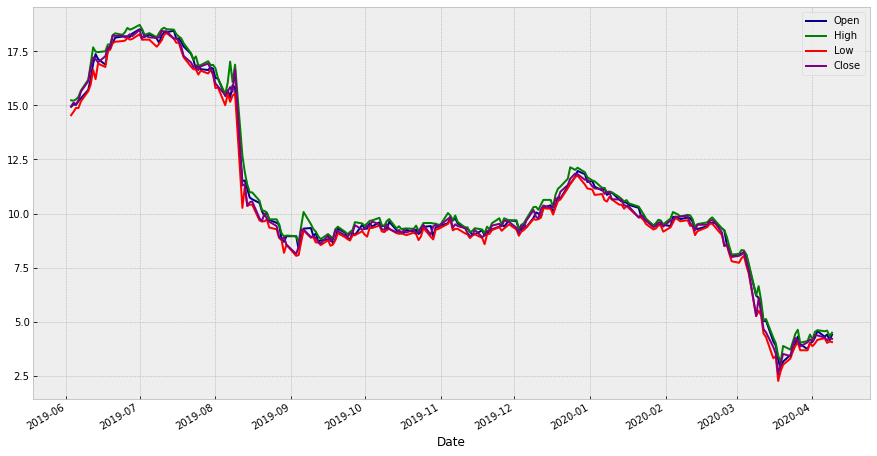

In [24]:
plot.style.use('bmh')
ypf.plot('Date',['Open','High','Low','Close'], kind='line', figsize=(15,8), color=['darkblue','green','red','purple'])

### Gráfico de Dispersión

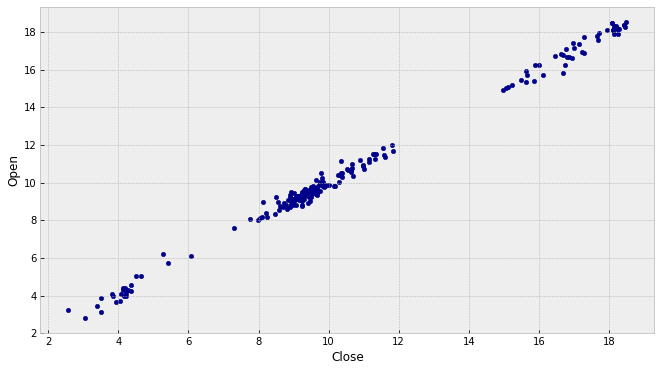

In [25]:
plot.style.use('bmh')
ypf.plot('Close', 'Open', kind='scatter', figsize=(11,6), color='darkblue')

### Gráfico Histograma

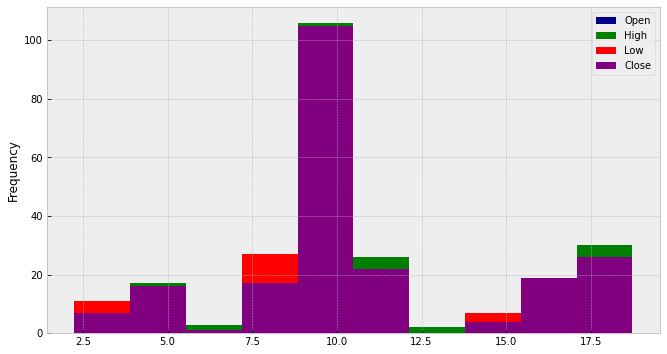

In [26]:
plot.style.use('bmh')
ypf.plot('Date', ['Open','High','Low','Close'], kind='hist', figsize=(11,6), color=['darkblue','green','red','purple'])

### Gráfico de Caja

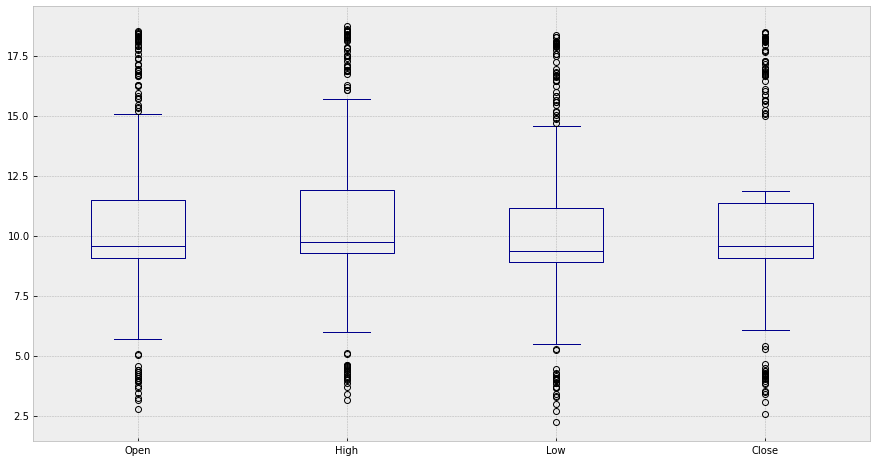

In [27]:
plot.style.use('bmh')
ypf.plot('Date',['Open','High','Low','Close'], kind='box', figsize=(15,8), color='darkblue')

### Gráfico KDE

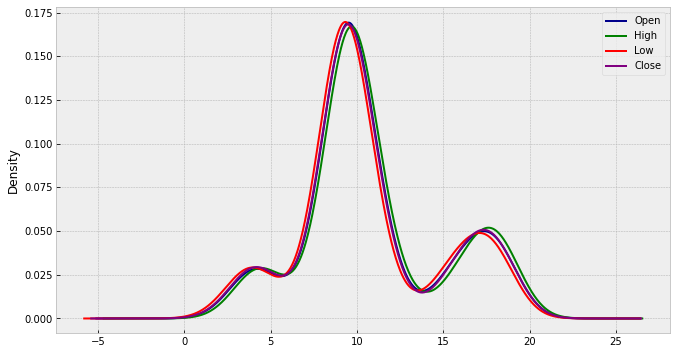

In [28]:
plot.style.use('bmh')
ypf.plot('Date',['Open','High','Low','Close'], kind='kde', figsize=(11,6), color=['darkblue','green','red','purple'])

### Gráfico de Áreas

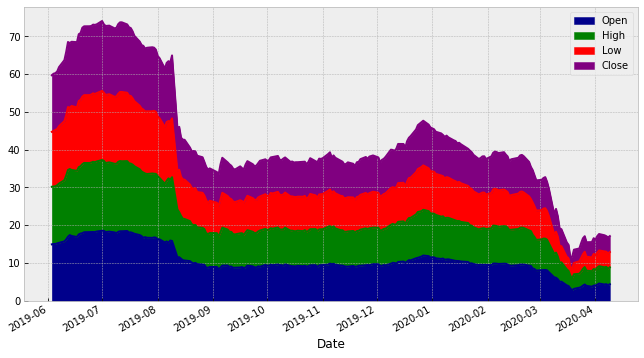

In [29]:
plot.style.use('bmh')
ypf.plot('Date',['Open','High','Low','Close'], kind='area', figsize=(11,6), color=['darkblue','green','red','purple'])

### Serie de Tiempo

[Text(0, 0.5, 'Retornos simples (%)')]

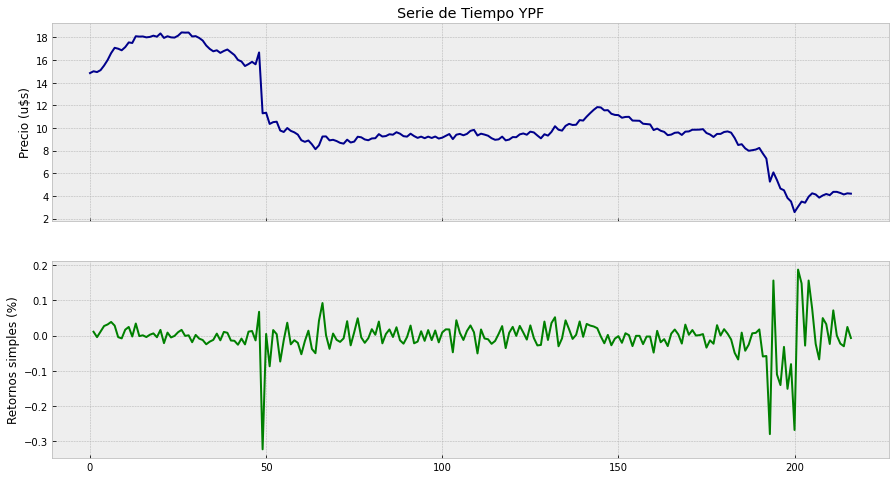

In [30]:
plt.style.use('bmh')
fig, ax = plt.subplots(2, 1, figsize=(15,8), sharex=True)

CloseAdj.Adj_Close.plot(ax=ax[0], color=['darkblue'])
ax[0].set(title = 'Serie de Tiempo YPF', ylabel = 'Precio (u$s)')
    
CloseAdj.Retorno_simple.plot(ax=ax[1], color=['green'])
ax[1].set(ylabel = 'Retornos simples (%)')

## **Datos atípicos**

In [31]:
df_rolling = CloseAdj[['Retorno_simple']].rolling(window=21).agg(['mean', 'std'])
df_rolling.columns = df_rolling.columns.droplevel()

In [32]:
df_outliers = CloseAdj.join(df_rolling)

In [33]:
def indentify_outliers(row, n_sigmas=3):
    x = row['Retorno_simple']
    mu = row['mean']
    sigma = row['std']
    
    if (x > mu + 3 * sigma) | (x < mu - 3 * sigma):
        return 1
    else:
        return 0

In [34]:
df_outliers['outlier'] = df_outliers.apply(indentify_outliers, axis=1)                                                                                                       
outliers = df_outliers.loc[df_outliers['outlier'] == 1, ['Retorno_simple']]

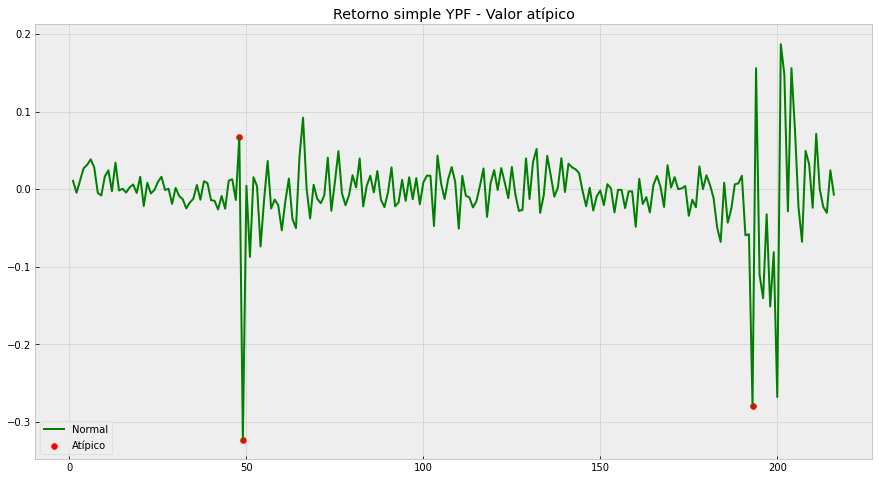

In [35]:
plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(15,8))

ax.plot(df_outliers.index, df_outliers.Retorno_simple, color='green', label='Normal')
ax.scatter(outliers.index, outliers.Retorno_simple, color='red', label='Atípico')
ax.set_title("Retorno simple YPF - Valor atípico")
ax.legend(loc='lower left')

## **Otros cálculos**

### Importando las librerías necesarias

In [36]:
import seaborn as sns 
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt

### Estadistica descriptiva


In [37]:
print(CloseAdj)

          Date  Adj_Close  Retorno_simple
0   2019-06-03  14.856053             NaN
1   2019-06-04  15.014835        0.010688
2   2019-06-05  14.945369       -0.004627
3   2019-06-06  15.114074        0.011288
4   2019-06-07  15.520953        0.026921
..         ...        ...             ...
212 2020-04-03   4.360000        0.000000
213 2020-04-06   4.260000       -0.022936
214 2020-04-07   4.130000       -0.030516
215 2020-04-08   4.230000        0.024213
216 2020-04-09   4.200000       -0.007092

[217 rows x 3 columns]


In [38]:
CloseAdj.describe()

,Adj_Close,Retorno_simple
count,217.000000,216.000000
mean,10.671958,-0.004395
std,3.946260,0.051194
min,2.570000,-0.322542
25%,9.070000,-0.019756
50%,9.560000,-0.001094
75%,11.350000,0.015449
max,18.450001,0.186770


In [39]:
CloseAdj.Retorno_simple.describe()

count    216.000000
mean      -0.004395
std        0.051194
min       -0.322542
25%       -0.019756
50%       -0.001094
75%        0.015449
max        0.186770
Name: Retorno_simple, dtype: float64

In [40]:
rango = CloseAdj.Retorno_simple.max() - CloseAdj.Retorno_simple.min()
rango

0.5093124076752479

In [41]:
media = CloseAdj.Retorno_simple.mean()
media

-0.004394858184663516

In [42]:
desviacion = CloseAdj.Retorno_simple.std()
desviacion

0.0511938730619571

In [43]:
norm_pdf = scs.norm.pdf(rango, loc=media, scale=desviacion) 

Text(0.5, 1.0, 'Q-Q plot Cierre Ajustado')

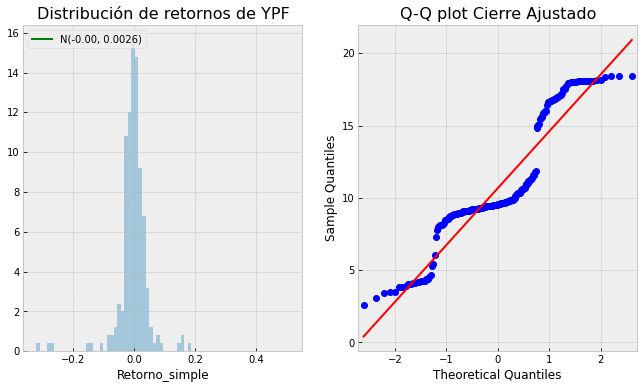

In [44]:
plt.style.use('bmh')
fig, ax = plt.subplots(1, 2, figsize=(11, 6))

# Histograma
sns.distplot(CloseAdj.Retorno_simple, kde=False, norm_hist=True, ax=ax[0]) 
ax[0].set_title('Distribución de retornos de YPF', fontsize=16) 
ax[0].plot(rango, norm_pdf, 'g', lw=2, label=f'N({media:.2f}, {desviacion**2:.4f})')
ax[0].legend(loc='upper left');

# Q-Q plot
qq = sm.qqplot(CloseAdj.Adj_Close.values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot Cierre Ajustado', fontsize = 16)


In [45]:
N_LAGS = 50
Nivel = 0.05

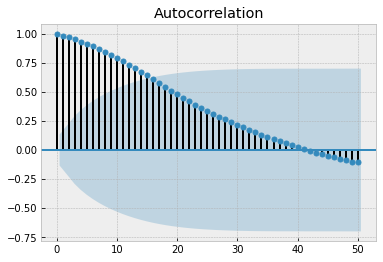

In [46]:
acf = smt.graphics.plot_acf(CloseAdj.Adj_Close, lags=N_LAGS, alpha=Nivel)

## **Series de tiempo**

In [47]:
print(CloseAdj)

          Date  Adj_Close  Retorno_simple
0   2019-06-03  14.856053             NaN
1   2019-06-04  15.014835        0.010688
2   2019-06-05  14.945369       -0.004627
3   2019-06-06  15.114074        0.011288
4   2019-06-07  15.520953        0.026921
..         ...        ...             ...
212 2020-04-03   4.360000        0.000000
213 2020-04-06   4.260000       -0.022936
214 2020-04-07   4.130000       -0.030516
215 2020-04-08   4.230000        0.024213
216 2020-04-09   4.200000       -0.007092

[217 rows x 3 columns]


In [48]:
import seaborn as sns
from fbprophet import Prophet
import pandas.util.testing as tm

In [49]:
CloseAdj.rename(columns={'Date': 'ds', 'Adj_Close': 'y'}, inplace=True)

In [50]:
CloseAdj = CloseAdj.drop(columns=['Retorno_simple'])

In [51]:
print(CloseAdj)

            ds          y
0   2019-06-03  14.856053
1   2019-06-04  15.014835
2   2019-06-05  14.945369
3   2019-06-06  15.114074
4   2019-06-07  15.520953
..         ...        ...
212 2020-04-03   4.360000
213 2020-04-06   4.260000
214 2020-04-07   4.130000
215 2020-04-08   4.230000
216 2020-04-09   4.200000

[217 rows x 2 columns]


In [52]:
train_indices = CloseAdj.ds.apply(lambda x: x.year) < 2021
df_train = CloseAdj.loc[train_indices].dropna()
df_test = CloseAdj.loc[~train_indices].reset_index(drop=True)

In [53]:
model_prophet = Prophet(seasonality_mode='additive')
model_prophet.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model_prophet.fit(df_train)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


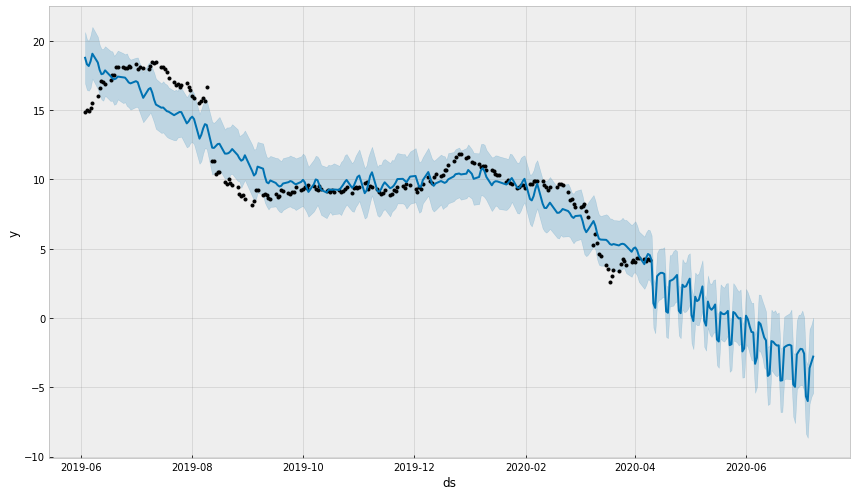

In [54]:
df_future = model_prophet.make_future_dataframe(periods=90)
df_pred = model_prophet.predict(df_future)
prophet = model_prophet.plot(df_pred, figsize=(12, 7))

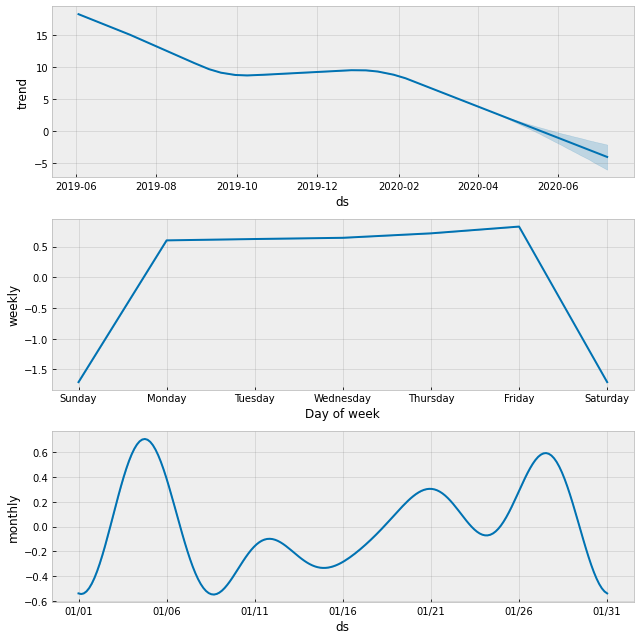

In [55]:
components = model_prophet.plot_components(df_pred)

In [56]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss

### Prueba de Dickey-Fuller aumentado

In [57]:
def adf_test(x):
    
    indices = ['Test Statistic', 'p-value',
               '# of Lags Used', '# of Observations Used']
    adf_test = adfuller(x, autolag='AIC')
    results = pd.Series(adf_test[0:4], index=indices)
    for key, value in adf_test[4].items():
        results[f'Critical Value ({key})'] = value

    return results

In [58]:
adf_test(CloseAdj.y)


Test Statistic             -0.557338
p-value                     0.880333
# of Lags Used              2.000000
# of Observations Used    214.000000
Critical Value (1%)        -3.461282
Critical Value (5%)        -2.875143
Critical Value (10%)       -2.574020
dtype: float64

La hipótesis nula de la prueba ADF establece que la serie temporal no es estacionaria. Con un valor p de 0.88 (o equivalente, el estadístico de prueba mayor que el valor crítico para el nivel de confianza seleccionado), no tenemos motivos para rechazar la hipótesis nula, lo que significa que podemos concluir que la serie no es estacionaria.

### Prueba Kwiatkowski-Phillips-Schmidt-Shin ( KPSS )

In [59]:
def kpss_test(x, h0_type='c'):

    indices = ['Test Statistic', 'p-value', '# of Lags']
    kpss_test = kpss(x, regression=h0_type)
    results = pd.Series(kpss_test[0:3], index=indices)
    for key, value in kpss_test[3].items():
        results[f'Critical Value ({key})'] = value

    return results

In [60]:
kpss_test(CloseAdj.y)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning:

p-value is smaller than the indicated p-value



Test Statistic            0.940678
p-value                   0.010000
# of Lags                15.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64

La hipótesis nula de la prueba KPSS es que la serie temporal es estacionaria. Con un valor p de 0.01 (o estadística de prueba mayor que el valor crítico seleccionado), tenemos razones para rechazar la hipótesis nula a favor de la alternativa, lo que significa que la serie no es estacionaria.

### Gráficos de la función de autocorrelación (parcial) ( PACF / ACF )

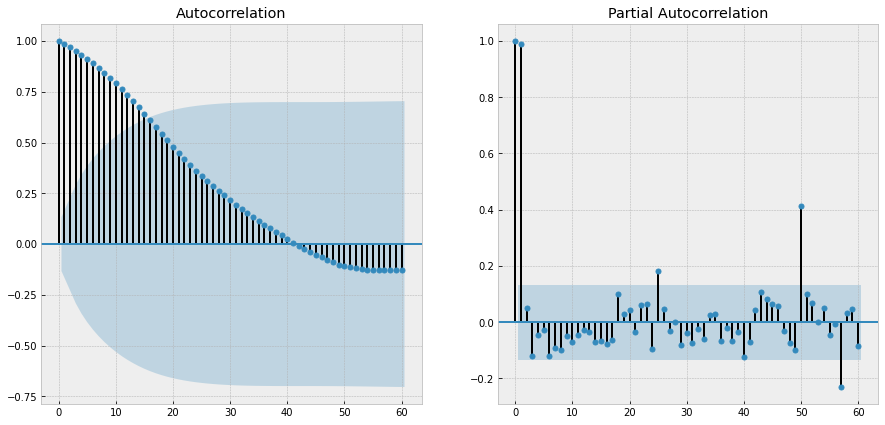

In [62]:
N_LAGS = 60
SIGNIFICANCE_LEVEL = 0.05

fig, ax = plt.subplots(1, 2, figsize=(15, 7))
acf1 = plot_acf(CloseAdj.y, ax=ax[0], lags=N_LAGS, alpha=SIGNIFICANCE_LEVEL)
pacf1 = plot_pacf(CloseAdj.y, ax=ax[1], lags=N_LAGS, alpha=SIGNIFICANCE_LEVEL)

### Modelos ARIMA

Los modelos ARIMA son una clase de modelos estadísticos que se utilizan para analizar y pronosticar datos de series temporales. Su objetivo es hacerlo describiendo las autocorrelaciones en los datos. ARIMA significa Autoregressive Integrated Moving Average y es una extensión de un modelo ARMA más simple. El objetivo del componente de integración adicional es garantizar la estacionariedad de la serie, porque, en contraste con los modelos de suavizado exponencial, la clase ARIMA requiere que las series temporales sean estacionarias

In [63]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
import scipy.stats as scs

In [64]:
YPF = data.DataReader("YPF", start='2019-06-01', end='2020-04-12', data_source='yahoo')

In [65]:
df = YPF.resample('W').last().rename(columns={'Adj Close': 'adj_close'}).adj_close

In [66]:
df.head()

Date
2019-06-09    15.520953
2019-06-16    16.870602
2019-06-23    18.081314
2019-06-30    18.071390
2019-07-07    18.011847
Freq: W-SUN, Name: adj_close, dtype: float64

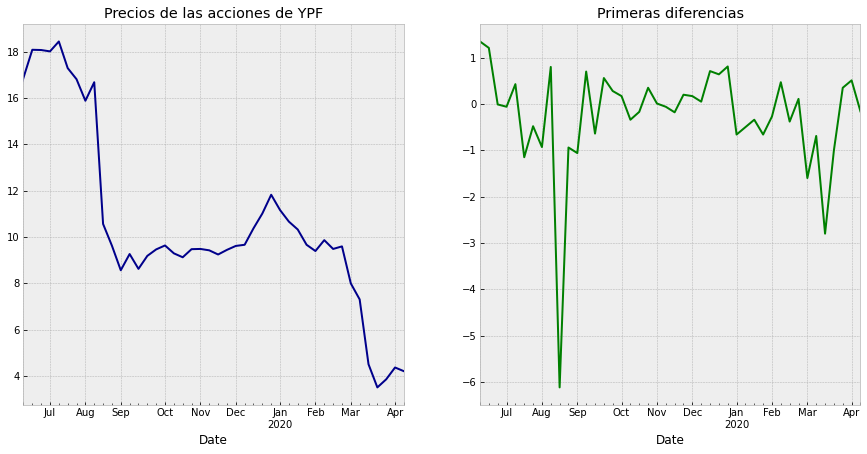

In [67]:
df_diff = df.diff().dropna()

plot.style.use('bmh')
fig, ax = plt.subplots(1,2, figsize=(15, 7), sharex=True)
df.plot(title = "Precios de las acciones de YPF", ax=ax[0], color=['darkblue'])
df_diff.plot(ax=ax[1], title='Primeras diferencias', color=['green'])

In [68]:
arima = ARIMA(df, order=(2, 1, 1)).fit(disp=0)
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.adj_close   No. Observations:                   44
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 -67.347
Method:                       css-mle   S.D. of innovations              1.115
Date:                Tue, 21 Jul 2020   AIC                            144.693
Time:                        04:06:34   BIC                            153.614
Sample:                    06-16-2019   HQIC                           148.001
                         - 04-12-2020                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.2378      0.223     -1.065      0.293      -0.676       0.200
ar.L1.D.adj_close    -0.4831      0.295     -1.638      0.109      -1.061       0.095
ar.L2.D.adj_close     0.2816      0.150      1.876      0.068      -0.013       0.576
ma.L1.D.adj_close     0.6069      0.279      2.172      0.036       0.059       1.155
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2127           +0.0000j            1.2127            0.5000
AR.2            2.9285           +0.0000j            2.9285            0.0000
MA.1           -1.6477           +0.0000j            1.6477            0.5000
-----------------------------------------------------------------------------
"""

In [72]:
def arima_diagnostics(resids, n_lags=40):
     
    # create placeholder subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 9))

    r = resids
    resids = (r - np.nanmean(r)) / np.nanstd(r)
    resids_nonmissing = resids[~(np.isnan(resids))]
    
    # residuals over time
    Standardized = sns.lineplot(x=np.arange(len(resids)), y=resids, ax=ax1)
    ax1.set_title('Standardized residuals')

    # distribution of residuals
    x_lim = (-1.96 * 2, 1.96 * 2)
    r_range = np.linspace(x_lim[0], x_lim[1])
    norm_pdf = scs.norm.pdf(r_range)
    
    Residuals = sns.distplot(resids_nonmissing, hist=True, kde=True, 
                 norm_hist=True, ax=ax2)
    
    ax2.plot(r_range, norm_pdf, 'g', lw=2, label='N(0,1)')
    ax2.set_title('Distribution of standardized residuals')
    ax2.set_xlim(x_lim)
    ax2.legend()
        
    # Q-Q plot
    qq = sm.qqplot(resids_nonmissing, line='s', ax=ax3)
    ax3.set_title('Q-Q plot')

    # ACF plot
    Acf = plot_acf(resids, ax=ax4, lags=n_lags, alpha=0.05)
    ax4.set_title('ACF plot')

    return fig

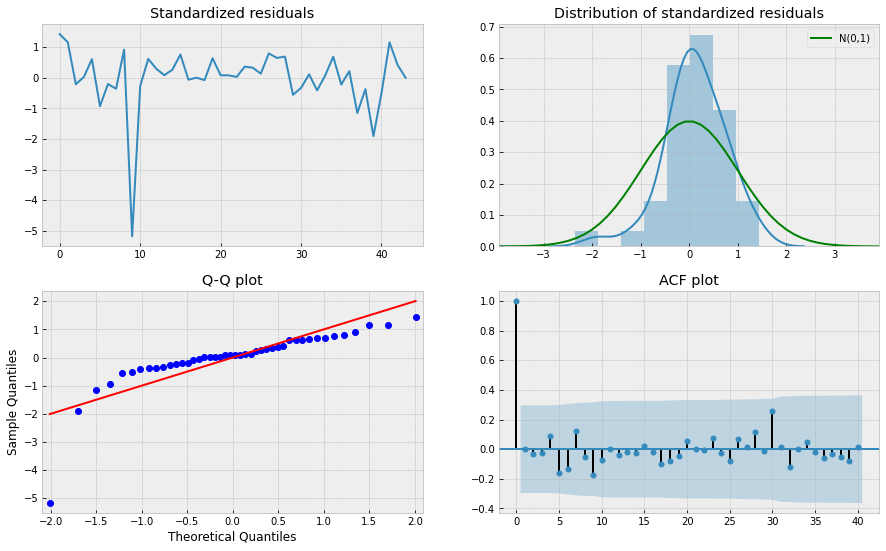

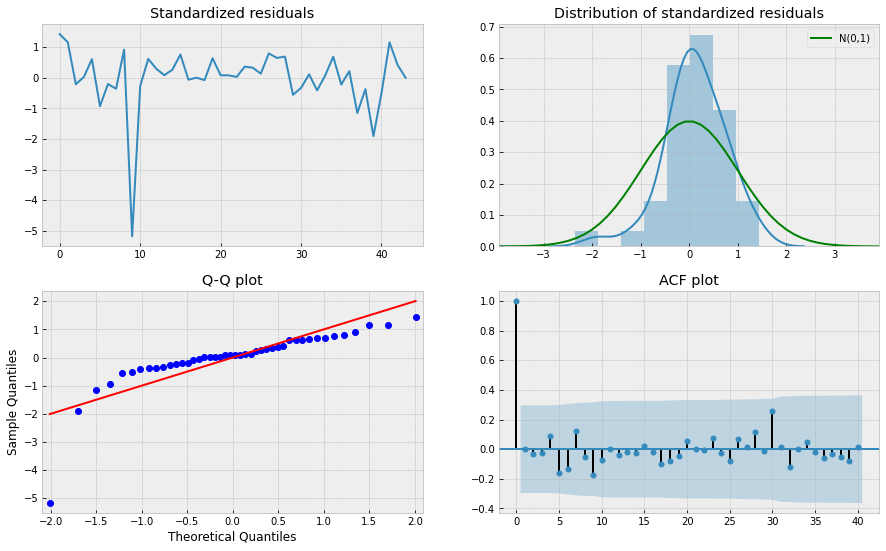

In [ ]:
arima_diagnostics(arima.resid, 40)

### Prueba de Ljung-Box

[Text(0, 0.5, 'p-value'),
 Text(0.5, 0, 'Lag'),
 Text(0.5, 1.0, 'Ljung-Box resultados del test')]

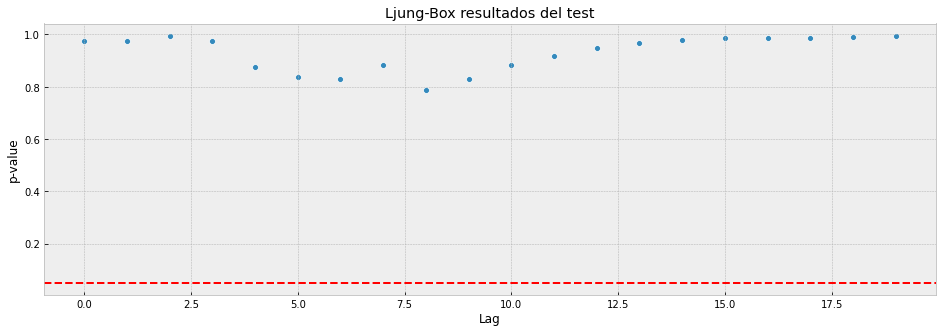

In [73]:
ljung_box_results = acorr_ljungbox(arima.resid)

fig, ax = plt.subplots(1, figsize=[16, 5])
sns.scatterplot(x=range(len(ljung_box_results[1])), 
                y=ljung_box_results[1], 
                ax=ax)
ax.axhline(0.05, ls='--', c='r')
ax.set(title="Ljung-Box resultados del test",
       xlabel='Lag',
       ylabel='p-value')

### Modelos Multifactoriales


In [ ]:
pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=a46d6037c044b003fb2c3fe6c29fc6fe2e195c3ea87c00c20b60c3f6da6539af
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [75]:
pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=12f974f0a20a6e7e586ad411dce82874068f31e0f1df9015da16274ce625eb13
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [76]:
import statsmodels.api as sm
import yfinance as yf

In [79]:
RISKY_ASSET = 'YPF'
MARKET_BENCHMARK = '^GSPC'
START_DATE = '2019-06-01'
END_DATE = '2020-04-12'

In [80]:
df = yf.download([RISKY_ASSET, MARKET_BENCHMARK],
                 start=START_DATE,
                 end=END_DATE,
                 adjusted=True,
                 progress=False)

In [81]:
df.shape

(217, 12)

In [82]:
df.head()

Adj Close               Close  ...         Open   Volume            
                  YPF        ^GSPC    YPF  ...        ^GSPC      YPF       ^GSPC
Date                                       ...                                  
2019-06-03  14.856053  2744.449951  14.97  ...  2751.530029  1471900  3943810000
2019-06-04  15.014835  2803.270020  15.13  ...  2762.639893  2318800  3810430000
2019-06-05  14.945369  2826.149902  15.06  ...  2818.090088   947700  3548830000
2019-06-06  15.114074  2843.489990  15.23  ...  2828.510010   868200  3396410000
2019-06-07  15.520953  2873.340088  15.64  ...  2852.870117  1189200  3220250000

[5 rows x 12 columns]

In [83]:
X = df['Adj Close'].rename(columns={RISKY_ASSET: 'asset', 
                                    MARKET_BENCHMARK: 'market'}) \
                   .resample('M') \
                   .last() \
                   .pct_change() \
                   .dropna()

In [84]:
covariance = X.cov().iloc[0,1]
benchmark_variance = X.market.var()
beta = covariance / benchmark_variance
beta

2.658438468645381

In [85]:
y = X.pop('asset')
X = sm.add_constant(X)

capm_model = sm.OLS(y, X).fit()
print(capm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  asset   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     7.685
Date:                Tue, 21 Jul 2020   Prob (F-statistic):             0.0242
Time:                        04:13:23   Log-Likelihood:                 4.5405
No. Observations:                  10   AIC:                            -5.081
Df Residuals:                       8   BIC:                            -4.476
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0958      0.054     -1.760      0.1

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=10



In [86]:
N_DAYS = 90

In [87]:
df_rf = yf.download('^IRX', start=START_DATE, end=END_DATE)

[*********************100%***********************]  1 of 1 completed


In [88]:
rf = df_rf.resample('M').last().Close / 100
rf

Date
2019-06-30    0.02035
2019-07-31    0.02030
2019-08-31    0.01933
2019-09-30    0.01770
2019-10-31    0.01498
2019-11-30    0.01565
2019-12-31    0.01505
2020-01-31    0.01510
2020-02-29    0.01230
2020-03-31    0.00030
2020-04-30    0.00210
Freq: M, Name: Close, dtype: float64

In [89]:
rf = ( 1 / (1 - rf * N_DAYS / 360) )**(1 / N_DAYS)  
rf = (rf ** 30) - 1 

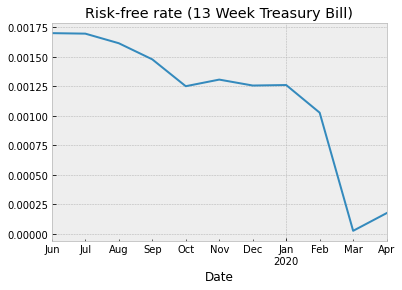

In [90]:
rf.plot(title='Risk-free rate (13 Week Treasury Bill)')

In [91]:
import pandas_datareader.data as web

In [92]:
rf = web.DataReader('TB3MS', 'fred', start=START_DATE, 
                     end=END_DATE)

In [93]:
rf = (1 + (rf / 100)) ** (1 / 12) - 1

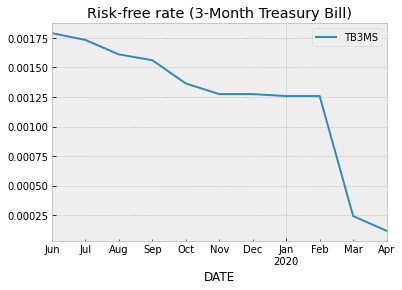

In [94]:
rf.plot(title='Risk-free rate (3-Month Treasury Bill)')

## **Simulaciones de Monte Carlo**


In [95]:
df = yf.download(RISKY_ASSET, start=START_DATE, end=END_DATE, adjusted=True)

[*********************100%***********************]  1 of 1 completed


In [96]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-03,14.94,15.24,14.55,14.97,14.856053,1471900
2019-06-04,15.05,15.22,14.71,15.13,15.014835,2318800
2019-06-05,15.03,15.28,14.89,15.06,14.945369,947700
2019-06-06,15.20,15.40,14.88,15.23,15.114074,868200
2019-06-07,15.33,15.69,15.19,15.64,15.520953,1189200


Average return: -0.44%


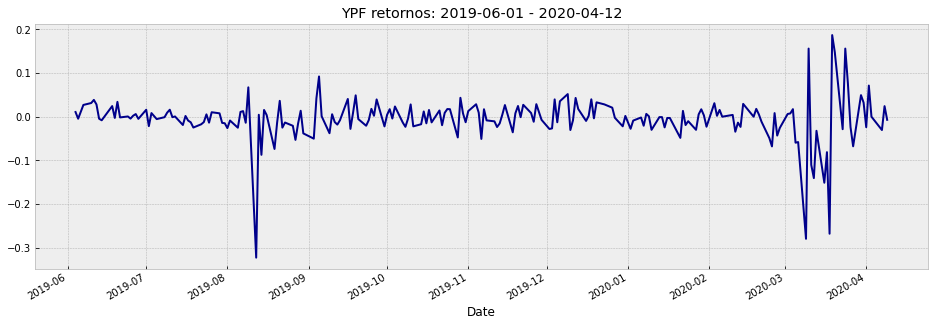

In [97]:
adj_close = df['Adj Close']
returns = adj_close.pct_change().dropna()
print(f'Average return: {100 * returns.mean():.2f}%')
returns.plot(title=f'{RISKY_ASSET} retornos: {START_DATE} - {END_DATE}', figsize=[16, 5], color=['darkblue'])

In [98]:
train = returns['2019-06-01':'2019-11-30']
test = returns['2019-12-01':'2020-04-12']

In [99]:
T = len(test)
N = len(test)
S_0 = adj_close[train.index[-1].date()]
N_SIM = 100
mu = train.mean()
sigma = train.std()

In [100]:
def simulate_gbm(s_0, mu, sigma, n_sims, T, N):
    
    dt = T/N
    dW = np.random.normal(scale = np.sqrt(dt), 
                          size=(n_sims, N))
    W = np.cumsum(dW, axis=1)

    time_step = np.linspace(dt, T, N)
    time_steps = np.broadcast_to(time_step, (n_sims, N))

    S_t = s_0 * np.exp((mu - 0.5 * sigma ** 2) * time_steps 
                       + sigma * W)
    S_t = np.insert(S_t, 0, s_0, axis=1)
    
    return S_t

In [101]:
gbm_simulations = simulate_gbm(S_0, mu, sigma, N_SIM, T, N)

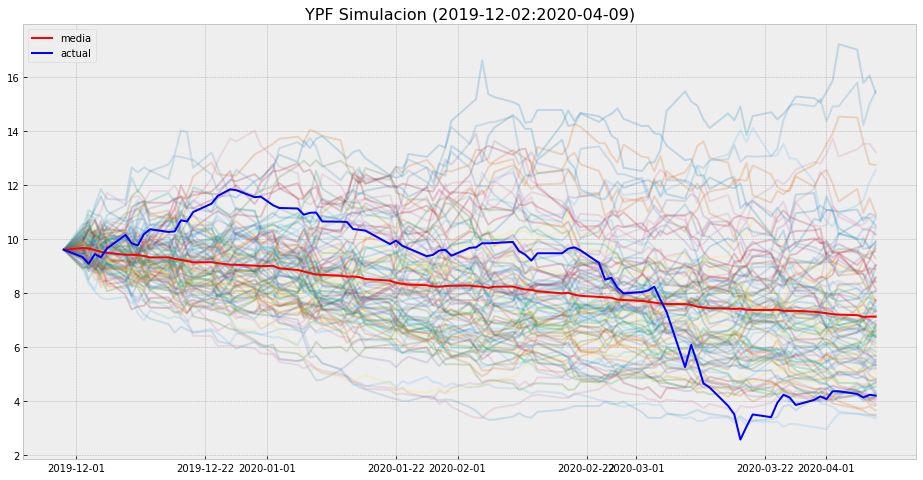

In [102]:
# prepare objects for plotting 
LAST_TRAIN_DATE = train.index[-1].date()
FIRST_TEST_DATE = test.index[0].date()
LAST_TEST_DATE = test.index[-1].date()
PLOT_TITLE = (f'{RISKY_ASSET} Simulacion '
              f'({FIRST_TEST_DATE}:{LAST_TEST_DATE})')

selected_indices = adj_close[LAST_TRAIN_DATE:LAST_TEST_DATE].index
index = [date.date() for date in selected_indices]

gbm_simulations_df = pd.DataFrame(np.transpose(gbm_simulations), index=index)

# plotting
ax = gbm_simulations_df.plot(alpha=0.2, legend=False, figsize=[16, 8])
line_1, = ax.plot(index, gbm_simulations_df.mean(axis=1), color='red')
line_2, = ax.plot(index, adj_close[LAST_TRAIN_DATE:LAST_TEST_DATE], color='blue')
ax.set_title(PLOT_TITLE, fontsize=16)
ax.legend((line_1, line_2), ('media', 'actual'))

Tenga en cuenta que esta visualización solo es factible para un número razonable de rutas de muestra. En casos de la vida real, queremos utilizar significativamente más rutas de muestra que 100, ya que generalmente, a mayor número de rutas de muestra, más precisos / confiables son los resultados.

## **Aprendizaje profundo**

In [103]:
import yfinance as yf
import numpy as np
import tensorflow as tf
from tensorflow import keras

import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import (Dataset, TensorDataset, DataLoader, Subset)

from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [104]:
# data
TICKER = 'YPF'
START_DATE = '2019-01-06'
END_DATE = '2020-04-12'
N_LAGS = 3

# neural network 
VALID_SIZE = 12
BATCH_SIZE = 5
N_EPOCHS = 200

In [105]:
df = yf.download(TICKER, 
                 start=START_DATE, 
                 end=END_DATE,
                 progress=False)

df = df.resample("M").last()
prices = df['Adj Close'].values

In [106]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-31,15.99,16.360001,15.78,16.35,16.225550,1371600
2019-02-28,14.44,14.850000,13.92,14.14,14.032371,1251900
2019-03-31,13.85,14.040000,13.85,14.01,13.903360,2711100
2019-04-30,13.25,13.640000,13.25,13.53,13.427013,947900
2019-05-31,14.76,14.860000,14.61,14.83,14.717118,1144400


In [107]:
def create_input_data(series, n_lags=1):
    
    X, y = [], []
    for step in range(len(series) - n_lags):
        end_step = step + n_lags
        X.append(series[step:end_step])
        y.append(series[end_step])
    return np.array(X), np.array(y)

In [108]:
X, y = create_input_data(prices, N_LAGS)

X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).float().unsqueeze(dim=1)

In [109]:
valid_ind = len(X) - VALID_SIZE

dataset = TensorDataset(X_tensor, y_tensor)

train_dataset = Subset(dataset, list(range(valid_ind)))
valid_dataset = Subset(dataset, list(range(valid_ind, len(X))))

train_loader = DataLoader(dataset=train_dataset,     
                          batch_size=BATCH_SIZE)
valid_loader = DataLoader(dataset=valid_dataset,
                          batch_size=BATCH_SIZE)

In [110]:
next(iter(train_loader))[0]

tensor([[16.2255, 14.0324, 13.9034]])

In [111]:
naive_pred = prices[len(prices) - VALID_SIZE - 1:-1]
y_valid = prices[len(prices) - VALID_SIZE:]

naive_mse = mean_squared_error(y_valid, naive_pred)
naive_rmse = np.sqrt(naive_mse)
print(f"Naive forecast – MSE: {naive_mse:.2f}, RMSE: {naive_rmse:.2f}")


Naive forecast – MSE: 8.63, RMSE: 2.94


In [112]:
class MLP(nn.Module):
   
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.linear1 = nn.Linear(input_size, 8)
        self.linear2 = nn.Linear(8, 4)
        self.linear3 = nn.Linear(4, 1)
        self.dropout = nn.Dropout(p=0.2)
    
    
    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.linear2(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.linear3(x)
        return x

In [113]:
# set seed for reproducibility
torch.manual_seed(42)

model = MLP(N_LAGS).to(device) 
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [114]:
model

MLP(
  (linear1): Linear(in_features=3, out_features=8, bias=True)
  (linear2): Linear(in_features=8, out_features=4, bias=True)
  (linear3): Linear(in_features=4, out_features=1, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [115]:
PRINT_EVERY = 50
train_losses, valid_losses = [], []

for epoch in range(N_EPOCHS):
    running_loss_train = 0
    running_loss_valid = 0

    model.train()
    
    for x_batch, y_batch in train_loader:
        
        optimizer.zero_grad()
        
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        y_hat = model(x_batch)
        loss = loss_fn(y_batch, y_hat)
        loss.backward()
        optimizer.step()
        running_loss_train += loss.item() * x_batch.size(0)
        
    
    epoch_loss_train = running_loss_train / len(train_loader.dataset)
    train_losses.append(epoch_loss_train)

    with torch.no_grad():
        
        model.eval()
        
        for x_val, y_val in valid_loader:
            x_val = x_val.to(device)
            y_val = y_val.to(device)
            y_hat = model(x_val)
            loss = loss_fn(y_val, y_hat)
            running_loss_valid += loss.item() * x_val.size(0)
            
        
        epoch_loss_valid = running_loss_valid / len(valid_loader.dataset)
            
        if epoch > 0 and epoch_loss_valid < min(valid_losses):
            best_epoch = epoch
            torch.save(model.state_dict(), './mlp_checkpoint.pth')
            
        valid_losses.append(epoch_loss_valid)

    if epoch % PRINT_EVERY == 0:
        print(f"<{epoch}> – Train. loss: {epoch_loss_train:.2f} \t Valid. loss: {epoch_loss_valid:.2f}")
        
print(f'Lowest loss recorded in epoch: {best_epoch}')

<0> – Train. loss: 275.57 	 Valid. loss: 157.71
<50> – Train. loss: 166.01 	 Valid. loss: 113.06
<100> – Train. loss: 105.53 	 Valid. loss: 84.14
<150> – Train. loss: 77.92 	 Valid. loss: 62.69
Lowest loss recorded in epoch: 199


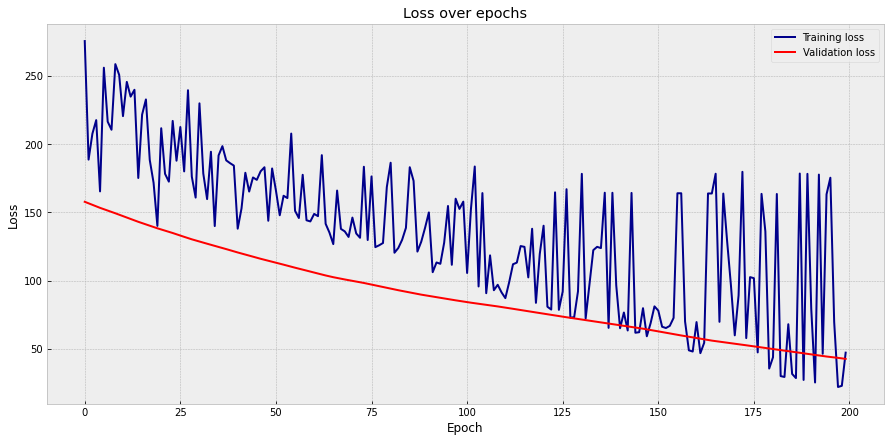

In [116]:
train_losses = np.array(train_losses)
valid_losses = np.array(valid_losses)

fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(train_losses, color='darkblue', label='Training loss')
ax.plot(valid_losses, color='red', label='Validation loss')

ax.set(title="Loss over epochs", 
       xlabel='Epoch', 
       ylabel='Loss')

ax.legend()

In [117]:
state_dict = torch.load('mlp_checkpoint.pth')
model.load_state_dict(state_dict)

<All keys matched successfully>

In [118]:
y_pred, y_valid= [], []

with torch.no_grad():

    model.eval()
    
    for x_val, y_val in valid_loader:
        x_val = x_val.to(device) 
        y_pred.append(model(x_val))
        y_valid.append(y_val)
        
y_pred = torch.cat(y_pred).numpy().flatten()
y_valid = torch.cat(y_valid).numpy().flatten()

MLP's forecast – MSE: 42.53, RMSE: 6.52


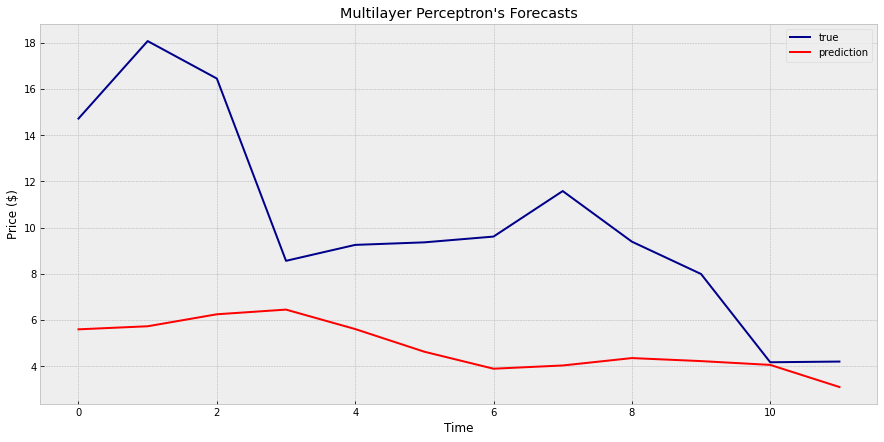

In [119]:
mlp_mse = mean_squared_error(y_valid, y_pred)
mlp_rmse = np.sqrt(mlp_mse)
print(f"MLP's forecast – MSE: {mlp_mse:.2f}, RMSE: {mlp_rmse:.2f}")

fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(y_valid, color='darkblue', label='true')
ax.plot(y_pred, color='red', label='prediction')

ax.set(title="Multilayer Perceptron's Forecasts", 
       xlabel='Time', 
       ylabel='Price ($)')

ax.legend()